# Example 2: Umbrella Sampling in 1D on a potential varying in 2D.

In [1]:
# Imports
import os
import sys

import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.special import logsumexp

from WHAM import binless
from WHAM import binned
from WHAM.lib import potentials
from WHAM import statistics

sys.path.append('.')
import single_particle_ld

## Visualize potential

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2


(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9ee122a90>)

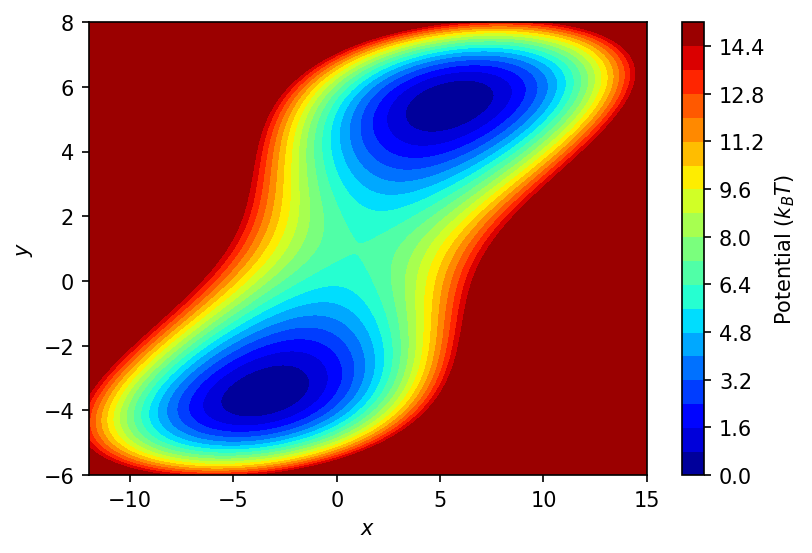

In [2]:
pot = single_particle_ld.SlipBondPotential2D()
vis = single_particle_ld.VisualizePotential2D(pot, temp=300,
                                              xrange=[-12, 15], yrange=[-6, 8],
                                              contourvals=20, clip=15)
vis.plot_potential()

## Unbiased simulation starting from lower basin

Let's run a 500 ps unbiased simulation of a particle on this landscape:

In [3]:
if not os.path.exists("examples_out/1D_US_hyst/unbiased"):
    os.makedirs("examples_out/1D_US_hyst/unbiased")
    
pot = single_particle_ld.SlipBondPotential2D()

sim = single_particle_ld.SingleParticleSimulation(pot,
                                                  init_coord=np.array([[-5, -4, 0]]),
                                                  cpu_threads=1)
sim(nsteps=50000 + 1,
    chkevery=10000,
    trajevery=10,
    energyevery=10,
    chkfile="examples_out/1D_US_hyst/unbiased/chk_state.pkl",
    trajfile="examples_out/1D_US_hyst/unbiased/traj.dat",
    energyfile="examples_out/1D_US_hyst/unbiased/energies.dat")

t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/unbiased/traj.dat").read_traj()

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
Running simulation on 1 CPU threads.


 24%|███████▉                          | 11753/50001 [00:00<00:02, 14587.14it/s]

Checkpoint at 100.0000000 ps


 44%|██████████████▊                   | 21861/50001 [00:01<00:01, 14116.39it/s]

Checkpoint at 200.0000000 ps


 64%|█████████████████████▊            | 32141/50001 [00:02<00:01, 14296.05it/s]

Checkpoint at 300.0000000 ps


 85%|████████████████████████████▊     | 42384/50001 [00:03<00:00, 12689.60it/s]

Checkpoint at 400.0000000 ps


100%|██████████████████████████████████| 50001/50001 [00:03<00:00, 14015.07it/s]

Checkpoint at 500.0000000 ps
Checkpoint at 500.0000000 ps


### Visualize trajectory

Text(0, 0.5, 'y')

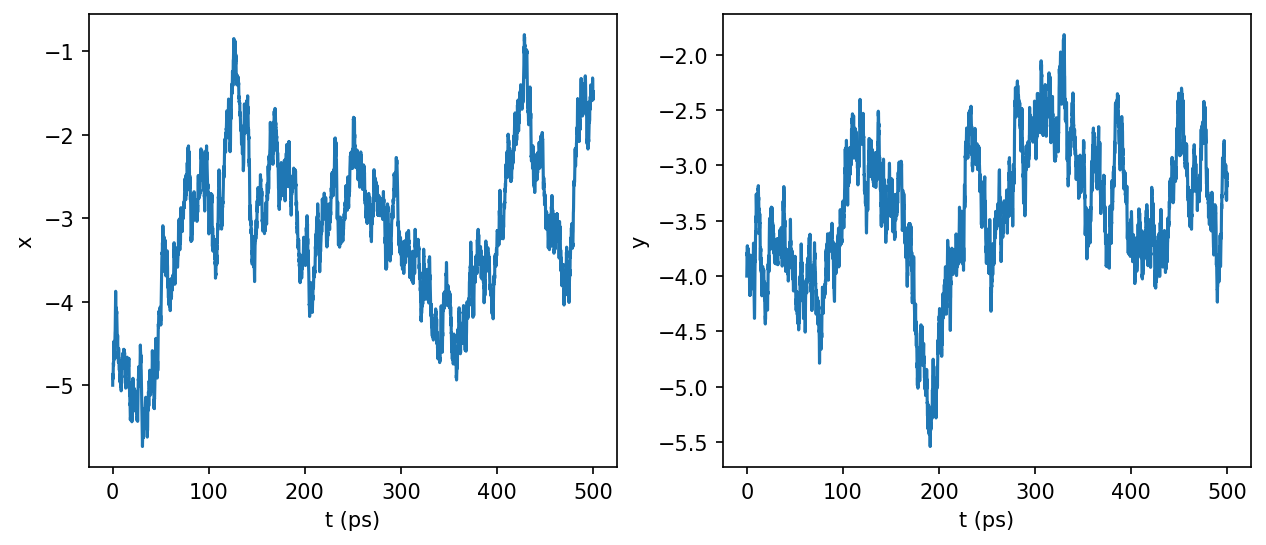

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(t, traj[:, 0])
ax[1].plot(t, traj[:, 1])
ax[0].set_xlabel("t (ps)")
ax[1].set_xlabel("t (ps)")
ax[0].set_ylabel("x")
ax[1].set_ylabel("y")

(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9f15e4850>)

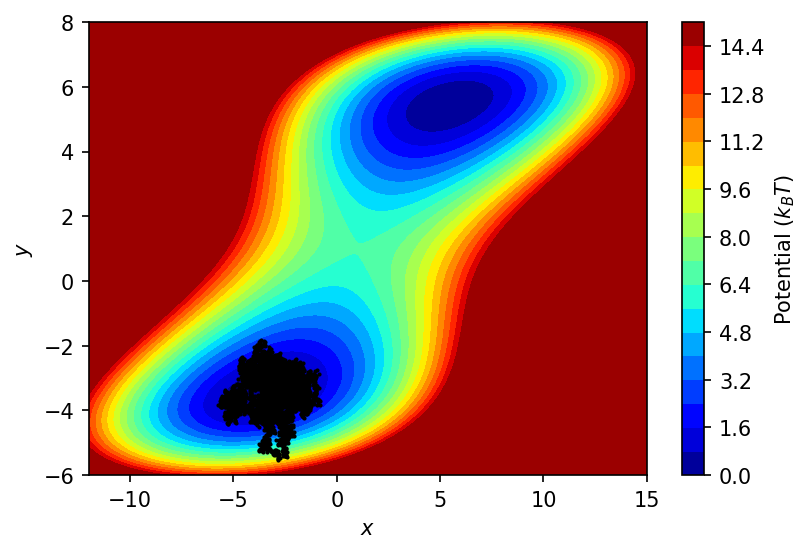

In [5]:
vis.scatter_traj(traj)

100%|██████████████████████████████████████| 5001/5001 [00:22<00:00, 225.75it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9f1241590>)

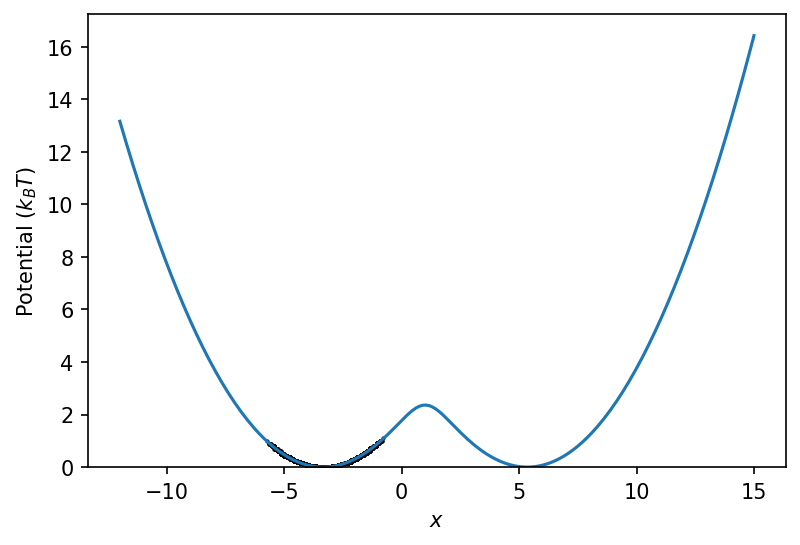

In [6]:
vis.scatter_traj_projection_x(traj)

100%|██████████████████████████████████████| 5001/5001 [00:20<00:00, 249.76it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9d7b6b950>)

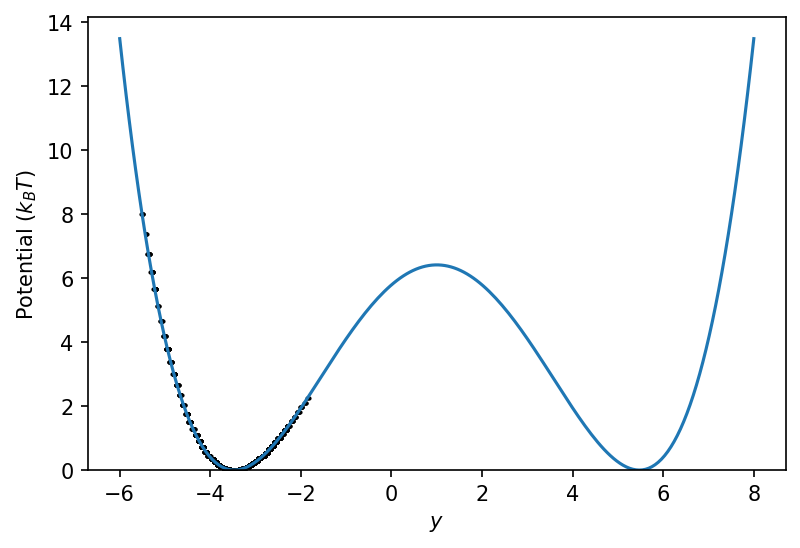

In [7]:
vis.scatter_traj_projection_y(traj)

## Unbiased simulation starting from upper basin

In [8]:
if not os.path.exists("examples_out/1D_US_hyst/unbiased_upper"):
    os.makedirs("examples_out/1D_US_hyst/unbiased_upper")

pot = single_particle_ld.SlipBondPotential2D()

sim = single_particle_ld.SingleParticleSimulation(pot,
                                                  init_coord=np.array([[6, 6, 0]]),
                                                  cpu_threads=1)
sim(nsteps=50000 + 1,
    chkevery=10000,
    trajevery=10,
    energyevery=10,
    chkfile="examples_out/1D_US_hyst/unbiased_upper/chk_state.pkl",
    trajfile="examples_out/1D_US_hyst/unbiased_upper/traj.dat",
    energyfile="examples_out/1D_US_hyst/unbiased_upper/energies.dat")

t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/unbiased_upper/traj.dat").read_traj()

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
Running simulation on 1 CPU threads.


 24%|████████▏                         | 11973/50001 [00:00<00:02, 14457.23it/s]

Checkpoint at 100.0000000 ps


 45%|███████████████▎                  | 22571/50001 [00:01<00:01, 15087.49it/s]

Checkpoint at 200.0000000 ps


 63%|█████████████████████▌            | 31631/50001 [00:02<00:01, 15075.31it/s]

Checkpoint at 300.0000000 ps


 84%|████████████████████████████▋     | 42177/50001 [00:02<00:00, 14883.74it/s]

Checkpoint at 400.0000000 ps


100%|██████████████████████████████████| 50001/50001 [00:03<00:00, 14303.47it/s]

Checkpoint at 500.0000000 ps
Checkpoint at 500.0000000 ps


### Visualize trajectory

Text(0, 0.5, 'y')

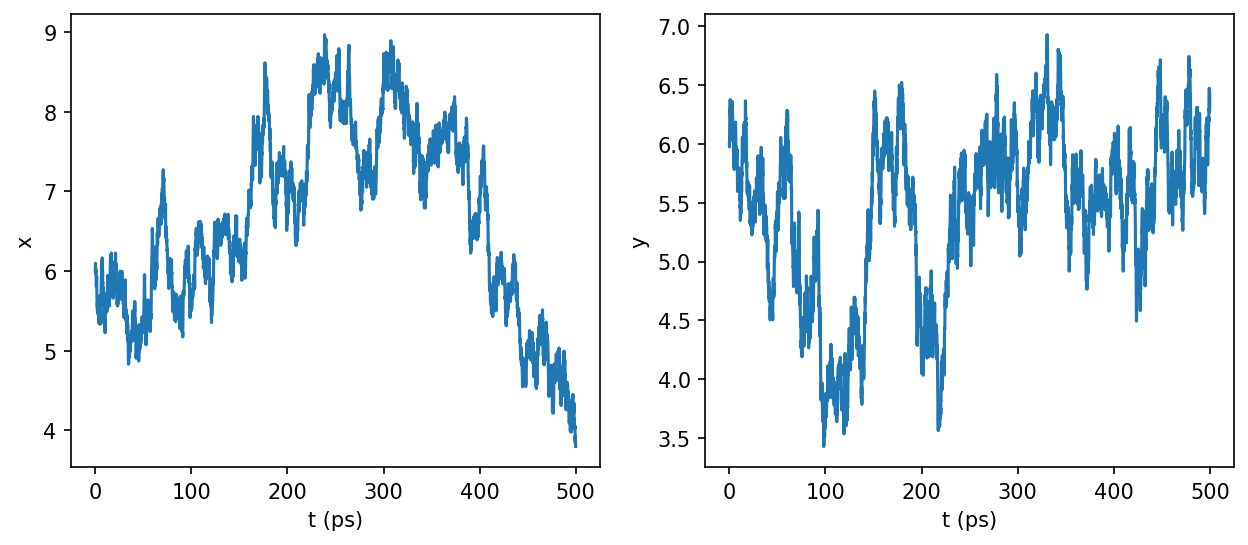

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(t, traj[:, 0])
ax[1].plot(t, traj[:, 1])
ax[0].set_xlabel("t (ps)")
ax[1].set_xlabel("t (ps)")
ax[0].set_ylabel("x")
ax[1].set_ylabel("y")

(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9ddc86a10>)

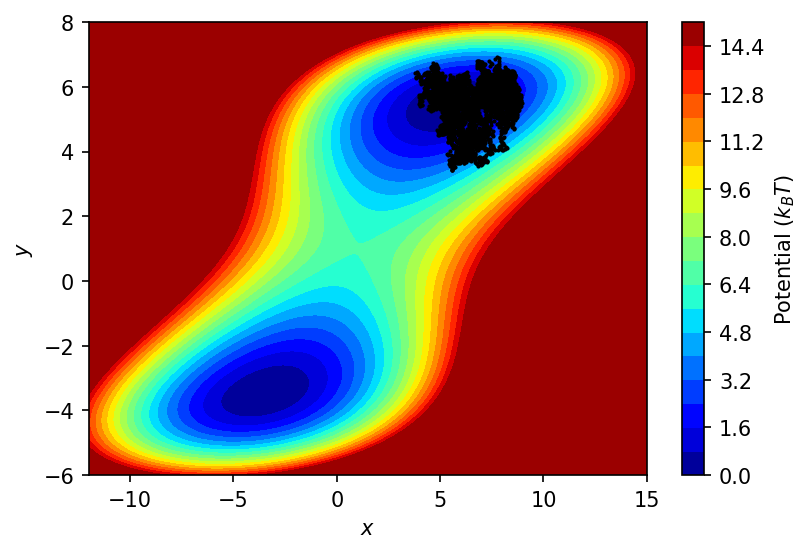

In [10]:
vis.scatter_traj(traj)

100%|██████████████████████████████████████| 5001/5001 [00:19<00:00, 255.27it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9dec28a90>)

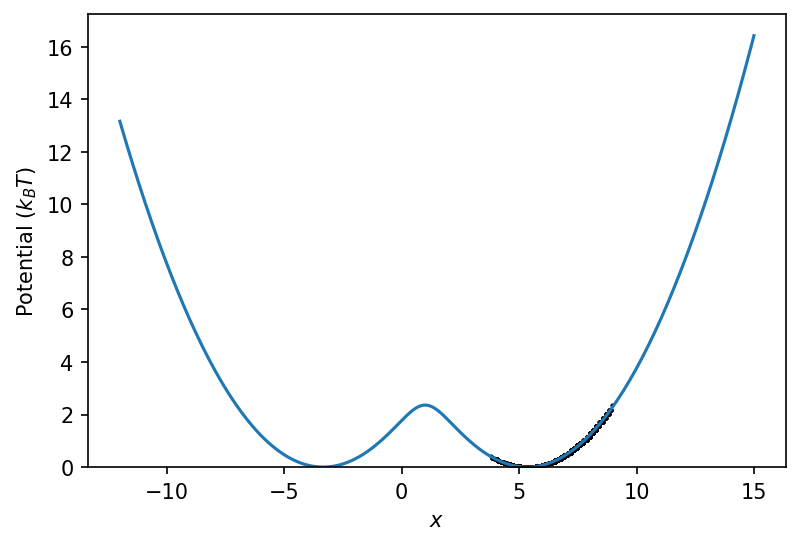

In [11]:
vis.scatter_traj_projection_x(traj)

100%|██████████████████████████████████████| 5001/5001 [00:21<00:00, 230.61it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9e3c929d0>)

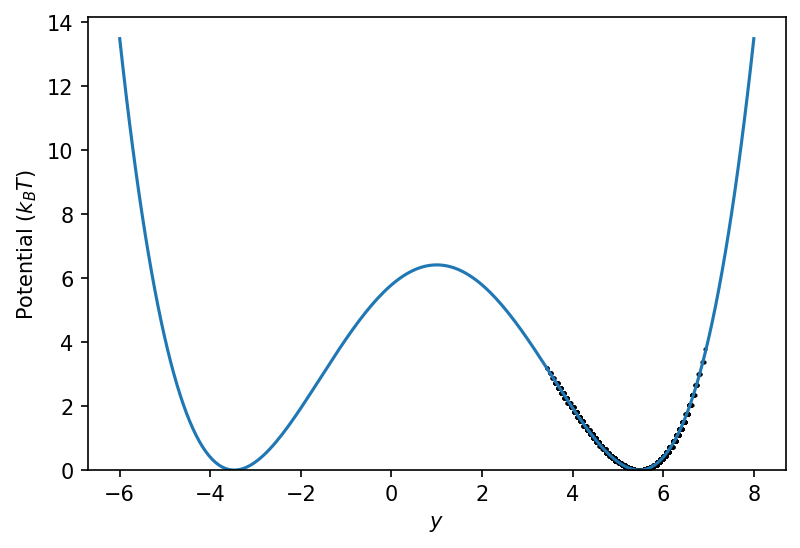

In [12]:
vis.scatter_traj_projection_y(traj)

## Umbrella sampling along $x$, starting from lower basin

In [13]:
kappa = 8
x_min = -12
x_max = 14
delta_x = 2
x_win = np.arange(x_min, x_max + delta_x, delta_x)

In [14]:
for x_0 in x_win:
    if not os.path.exists("examples_out/1D_US_hyst/biased/k{}x{:.2f}".format(kappa, x_0)):
        os.makedirs("examples_out/1D_US_hyst/biased/k{}x{:.2f}".format(kappa, x_0))
    
    pot = single_particle_ld.SlipBondPotential2D()

    umbrella = single_particle_ld.HarmonicBias(kappa_x=kappa, x_0=x_0)

    sim = single_particle_ld.SingleParticleSimulation(pot,
                                                      bias=umbrella,
                                                      init_coord=np.array([[-5, -4, 0]]),
                                                      cpu_threads=1)
    sim(nsteps=200000 + 1,
        chkevery=100000,
        trajevery=10,
        energyevery=10,
        chkfile="examples_out/1D_US_hyst/biased/k{}x{:.2f}/chk_state.pkl".format(kappa, x_0),
        trajfile="examples_out/1D_US_hyst/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0),
        energyfile="examples_out/1D_US_hyst/biased/k{}x{:.2f}/energies.dat".format(kappa, x_0))

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -12)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101421/200001 [00:07<00:06, 14188.33it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 12853.54it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -10)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102451/200001 [00:07<00:07, 13552.97it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14190.65it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -8)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101779/200001 [00:07<00:06, 14940.83it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13797.44it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -6)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101631/200001 [00:07<00:07, 13693.91it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14271.01it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -4)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102864/200001 [00:07<00:06, 14936.13it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 12237.36it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -2)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102401/200001 [00:09<00:06, 13962.53it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 12246.41it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 0)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102682/200001 [00:07<00:06, 14711.28it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13770.44it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 2)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102965/200001 [00:07<00:07, 13331.62it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14295.72it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 4)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102026/200001 [00:07<00:06, 14686.28it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 12133.41it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 6)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102932/200001 [00:07<00:06, 14089.54it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 13305.53it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 8)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 50%|████████████████▏               | 100811/200001 [00:07<00:07, 13997.46it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13898.40it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 10)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101625/200001 [00:07<00:06, 14777.41it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13686.54it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 12)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102960/200001 [00:07<00:06, 14835.42it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14286.09it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 14)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102381/200001 [00:07<00:06, 14549.12it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14084.75it/s]

Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps


### Visualizing trajectories from all windows

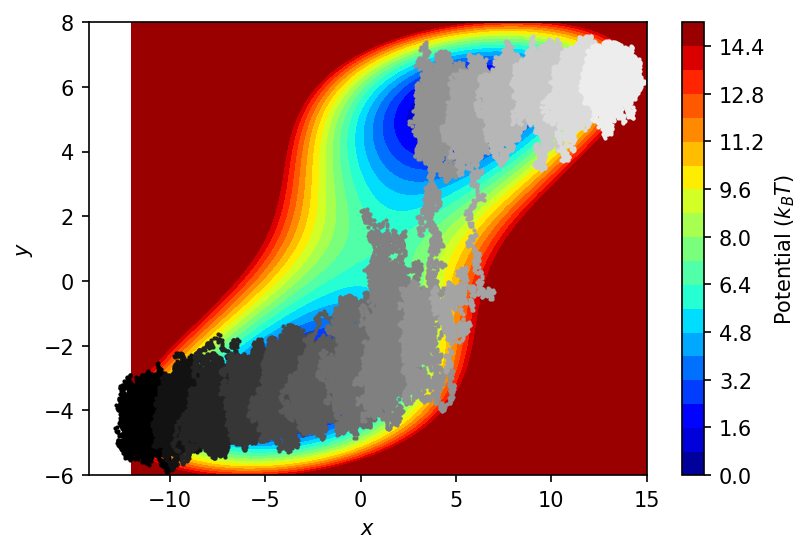

In [15]:
fig, ax = vis.plot_potential()

cmap = plt.get_cmap('gist_gray')
ax.set_prop_cycle(color=[cmap(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.scatter(traj[2000:, 0], traj[2000:, 1], s=1)

### WHAM

Text(0, 0.5, 'Count')

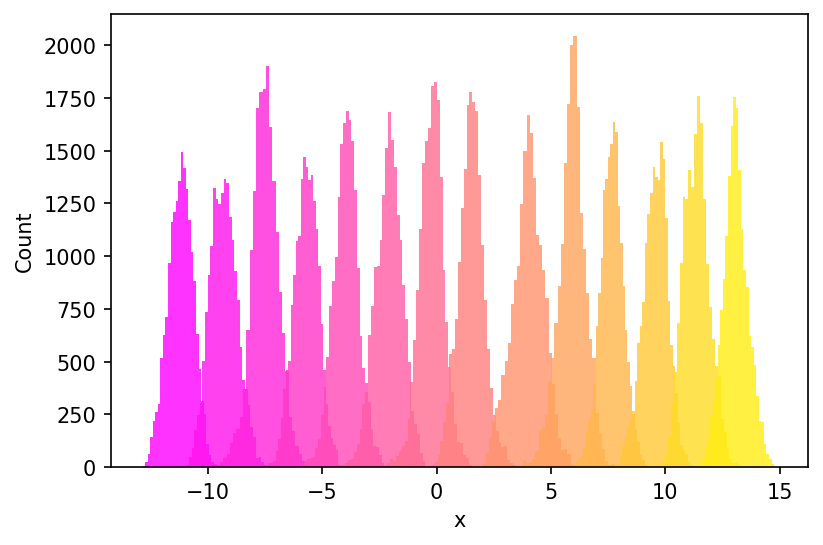

In [16]:
fig, ax = plt.subplots(dpi=150)

cmap = plt.get_cmap('spring')
ax.set_prop_cycle(color=[cmap(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.hist(traj[2000:, 0], bins=30, alpha=0.8)
    
ax.set_xlabel("x")
ax.set_ylabel("Count")

In [17]:
# Data
x_it = []
for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    x_it.append(traj[2000:, 0])
    
# Umbrella potentials
u_i = []
for x_0 in x_win:
    u_i.append(potentials.harmonic(kappa, x_0))
    
# Bins for free energy profile
x_bin = np.linspace(-12, 15, 101)

# Beta
beta = 1000 / (8.3145 * 300)

Text(0, 0.5, 'Free energy ($k_B T$)')

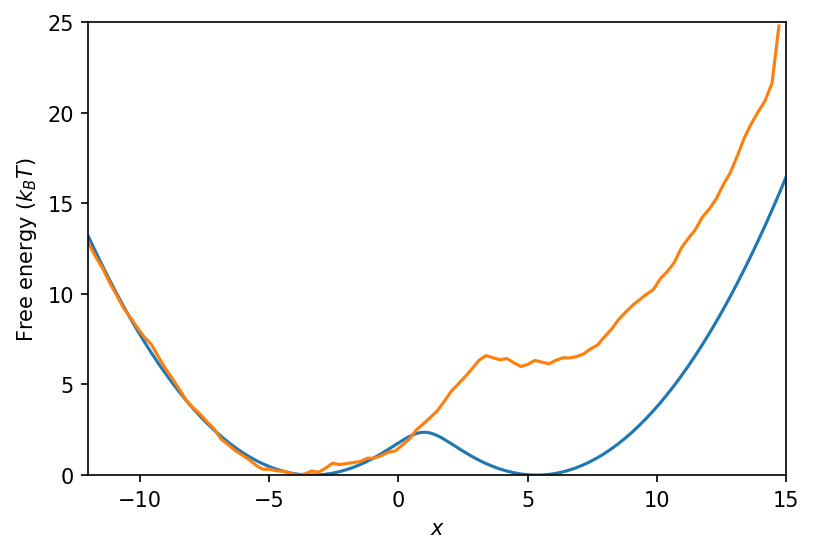

In [18]:
calc_binless = binless.Calc1D()
bF, _, _ = calc_binless.compute_betaF_profile(x_it, x_bin, u_i, beta=beta)
bF = bF - np.min(bF)
fig, ax, _, _ = vis.plot_projection_x() 
ax.plot(x_bin, bF)
ax.set_xlim(-12, 15)
ax.set_ylim(0, 25)
ax.set_ylabel(r"Free energy ($k_B T$)")

[0.08212604 0.00515486 0.01714192 0.00248876 0.00514073 0.00400159
 0.00646857 0.00339049 0.01101075 0.0155636  0.00310241 0.00254952
 0.00385762 0.00308367]


Text(0, 0.5, '$D_{KL}$')

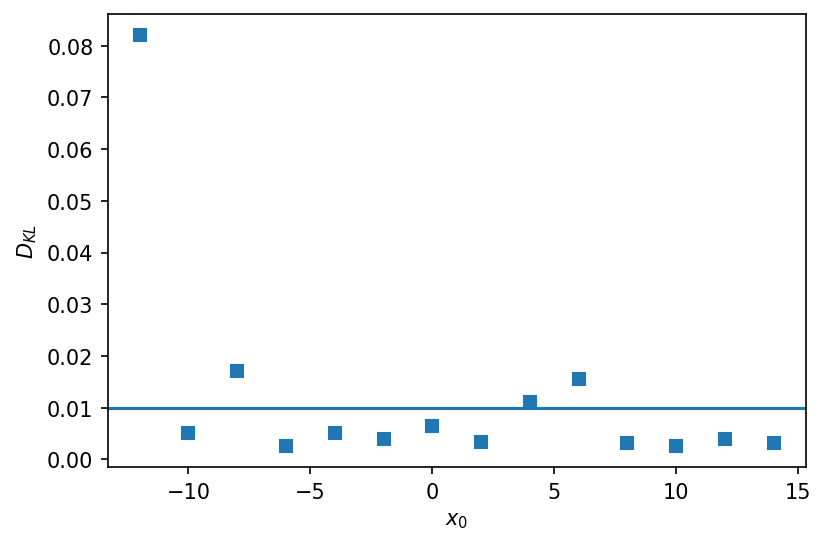

In [19]:
D_KL_i = statistics.binless_KLD_reweighted_win_betaF(calc_binless, x_it, x_bin, u_i, beta)
print(D_KL_i)

fig, ax = plt.subplots(dpi=150)
ax.plot(x_win, D_KL_i, 's')
ax.axhline(y=0.01)
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$D_{KL}$")

In [20]:
# Data
y_it = []
for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    y_it.append(traj[2000:, 1])
    
# Unroll
y_l = y_it[0]
for i in range(1, len(y_it)):
    y_l = np.hstack((y_l, y_it[i]))
    
# Bins
y_bin = np.linspace(-6, 8, 101)

In [21]:
bF_xy, _ = calc_binless.bin_2D_betaF_profile(y_l, x_bin, y_bin)

bF_xy = bF_xy - np.min(bF_xy)

Text(0.5, 1.0, 'Free energy $(k_B T)$')

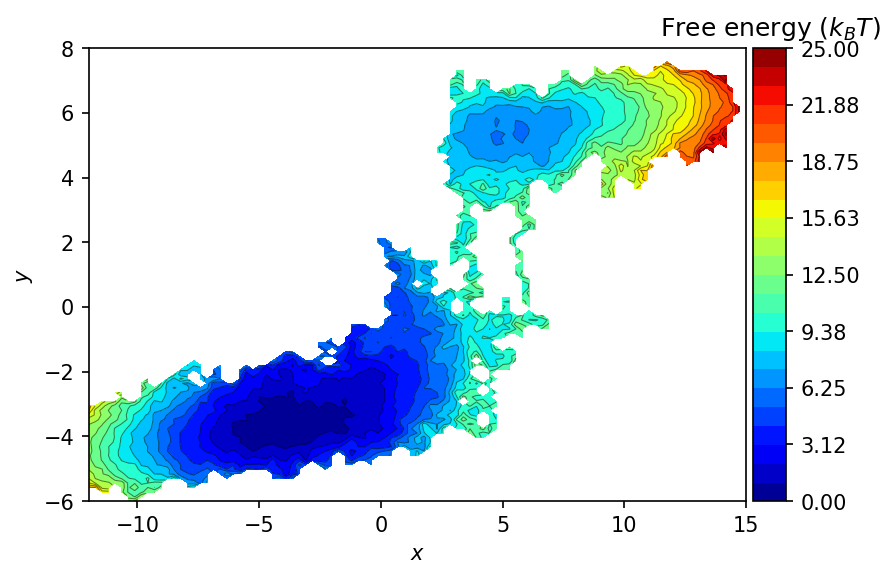

In [22]:
fig, ax = plt.subplots(dpi=150)

levels = np.linspace(0, 25, 25)
cmap = cm.jet
contour_filled = ax.contourf(x_bin, y_bin, bF_xy.T, levels, cmap=cm.get_cmap(cmap, len(levels) - 1))
ax.contour(contour_filled, colors='k', alpha=0.5, linewidths=0.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(contour_filled, cax=cax, orientation='vertical')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_xlim([-12, 15])
ax.set_ylim([-6, 8])

cax.set_title(r"Free energy $(k_B T)$")

## Umbrella sampling along $x$, starting from upper basin

In [23]:
kappa = 8
x_min = -12
x_max = 14
delta_x = 2
x_win = np.arange(x_min, x_max + delta_x, delta_x)

In [24]:
for x_0 in x_win:
    if not os.path.exists("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}".format(kappa, x_0)):
        os.makedirs("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}".format(kappa, x_0))
    
    pot = single_particle_ld.SlipBondPotential2D()

    umbrella = single_particle_ld.HarmonicBias(kappa_x=kappa, x_0=x_0)

    sim = single_particle_ld.SingleParticleSimulation(pot,
                                                      bias=umbrella,
                                                      init_coord=np.array([[6, 6, 0]]),
                                                      cpu_threads=1)
    sim(nsteps=200000 + 1,
        chkevery=100000,
        trajevery=10,
        energyevery=10,
        chkfile="examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/chk_state.pkl".format(kappa, x_0),
        trajfile="examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/traj.dat".format(kappa, x_0),
        energyfile="examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/energies.dat".format(kappa, x_0))

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -12)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102451/200001 [00:07<00:06, 14856.26it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14323.48it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -10)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101856/200001 [00:07<00:06, 14721.49it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14363.63it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -8)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102001/200001 [00:07<00:06, 15044.72it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14376.85it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -6)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102866/200001 [00:07<00:06, 14934.41it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13905.90it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -4)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101621/200001 [00:07<00:07, 13397.50it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14049.03it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - -2)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102815/200001 [00:07<00:06, 14633.55it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14254.36it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 0)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102541/200001 [00:07<00:06, 14602.56it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13515.47it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 2)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102091/200001 [00:07<00:08, 11637.12it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13619.01it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 4)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102428/200001 [00:07<00:07, 13824.50it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13613.02it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 6)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102951/200001 [00:07<00:06, 14901.90it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13718.69it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 8)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102924/200001 [00:07<00:06, 14954.48it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13846.09it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 10)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102633/200001 [00:07<00:06, 14666.47it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13637.43it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 12)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102551/200001 [00:07<00:06, 14890.58it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13848.90it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
8 / 2 * (x - 14)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102745/200001 [00:08<00:07, 13649.63it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 12663.05it/s]

Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps


### Visualizing trajectories from all windows

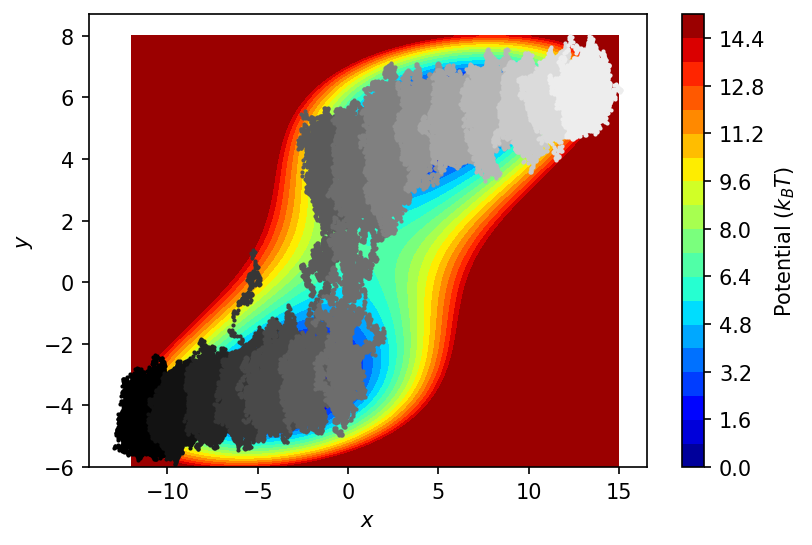

In [25]:
fig, ax = vis.plot_potential()

cmap = plt.get_cmap('gist_gray')
ax.set_prop_cycle(color=[cmap(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.scatter(traj[2000:, 0], traj[2000:, 1], s=1)

### WHAM

Text(0, 0.5, 'Count')

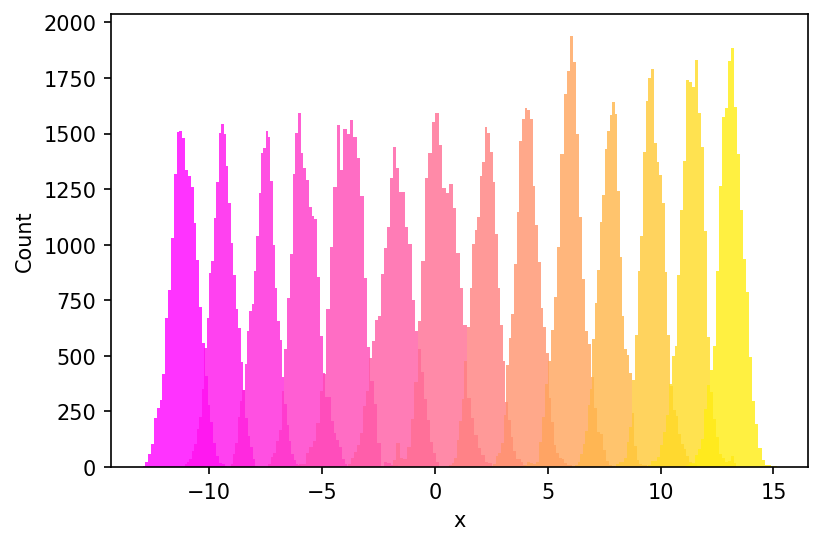

In [26]:
fig, ax = plt.subplots(dpi=150)

cmap = plt.get_cmap('spring')
ax.set_prop_cycle(color=[cmap(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.hist(traj[2000:, 0], bins=30, alpha=0.8)
    
ax.set_xlabel("x")
ax.set_ylabel("Count")

In [27]:
# Data
x_it = []
for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    x_it.append(traj[2000:, 0])
    
# Umbrella potentials
u_i = []
for x_0 in x_win:
    u_i.append(potentials.harmonic(kappa, x_0))
    
# Bins for free energy profile
x_bin = np.linspace(-12, 15, 101)

# Beta
beta = 1000 / (8.3145 * 300)

Text(0, 0.5, 'Free energy ($k_B T$)')

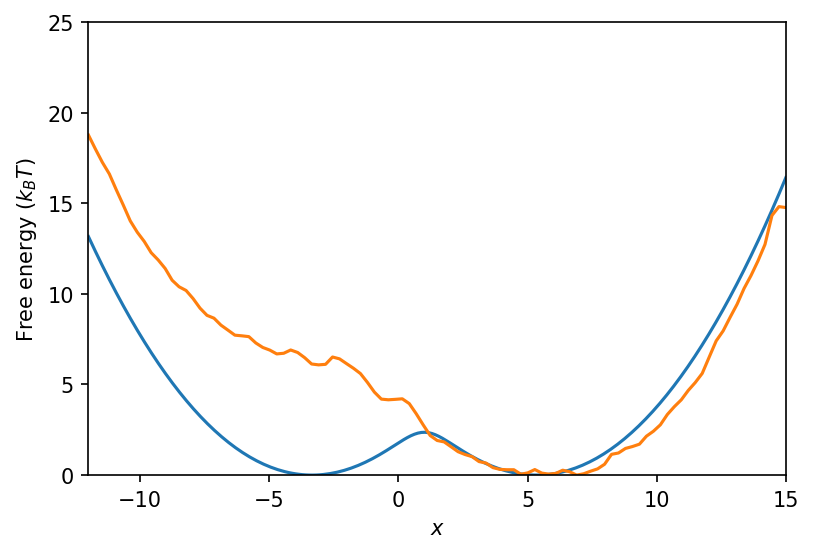

In [28]:
calc_binless = binless.Calc1D()
bF, _, _ = calc_binless.compute_betaF_profile(x_it, x_bin, u_i, beta=beta)
bF = bF - np.min(bF)
fig, ax, _, _ = vis.plot_projection_x() 
ax.plot(x_bin, bF)
ax.set_xlim(-12, 15)
ax.set_ylim(0, 25)
ax.set_ylabel(r"Free energy ($k_B T$)")

[0.07065986 0.00392171 0.00458765 0.01265992 0.01528389 0.01240305
 0.02557226 0.00256674 0.00342742 0.00284071 0.00969452 0.00993046
 0.00873125 0.001054  ]


Text(0, 0.5, '$D_{KL}$')

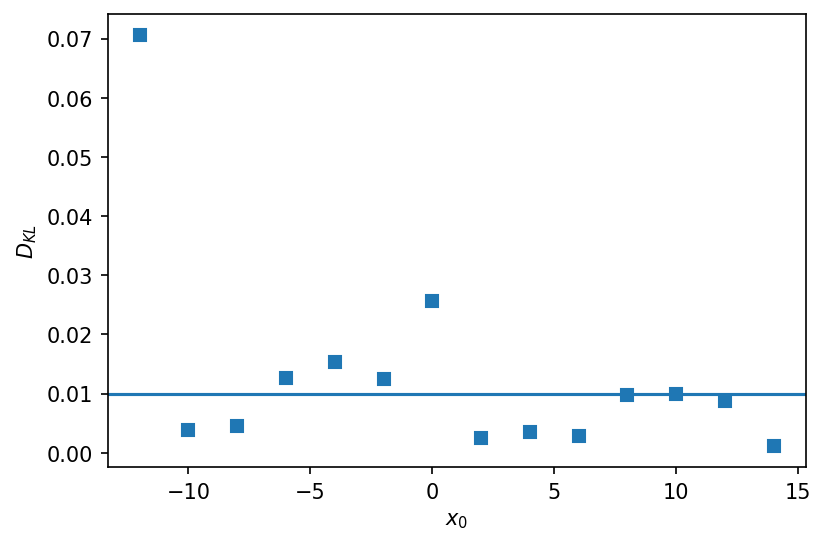

In [29]:
D_KL_i = statistics.binless_KLD_reweighted_win_betaF(calc_binless, x_it, x_bin, u_i, beta)
print(D_KL_i)

fig, ax = plt.subplots(dpi=150)
ax.plot(x_win, D_KL_i, 's')
ax.axhline(y=0.01)
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$D_{KL}$")

In [30]:
# Data
y_it = []
for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_upper/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    y_it.append(traj[2000:, 1])
    
# Unroll
y_l = y_it[0]
for i in range(1, len(y_it)):
    y_l = np.hstack((y_l, y_it[i]))
    
# Bins
y_bin = np.linspace(-6, 8, 101)

In [31]:
bF_xy, _ = calc_binless.bin_2D_betaF_profile(y_l, x_bin, y_bin)

bF_xy = bF_xy - np.min(bF_xy)

Text(0.5, 1.0, 'Free energy $(k_B T)$')

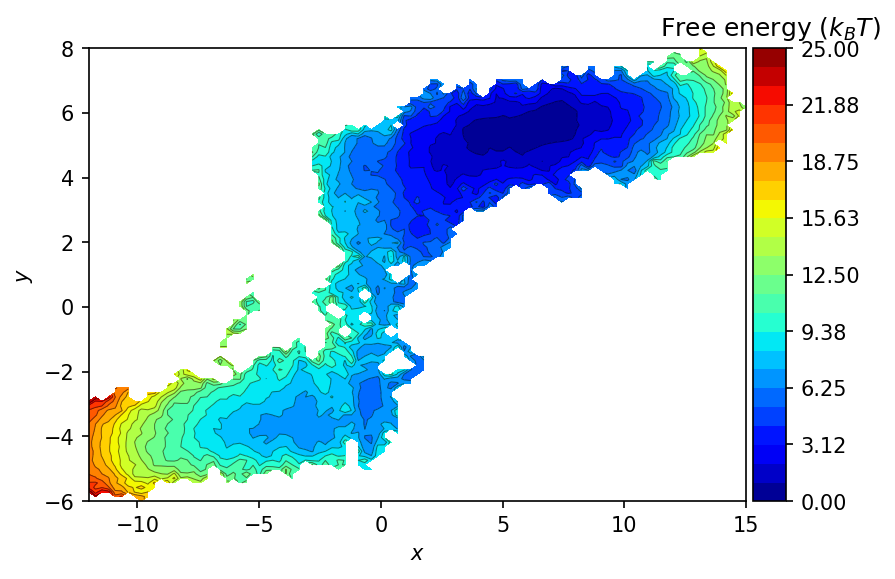

In [32]:
fig, ax = plt.subplots(dpi=150)

levels = np.linspace(0, 25, 25)
cmap = cm.jet
contour_filled = ax.contourf(x_bin, y_bin, bF_xy.T, levels, cmap=cm.get_cmap(cmap, len(levels) - 1))
ax.contour(contour_filled, colors='k', alpha=0.5, linewidths=0.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(contour_filled, cax=cax, orientation='vertical')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_xlim([-12, 15])
ax.set_ylim([-6, 8])

cax.set_title(r"Free energy $(k_B T)$")

## Umbrella sampling along $y$, starting from lower basin

In [33]:
kappa = 10
y_min = -6
y_max = 8
delta_y = 1
y_win = np.arange(y_min, y_max + delta_y, delta_y)

In [34]:
for y_0 in y_win:
    if not os.path.exists("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}".format(kappa, y_0)):
        os.makedirs("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}".format(kappa, y_0))
    
    pot = single_particle_ld.SlipBondPotential2D()

    umbrella = single_particle_ld.HarmonicBias(kappa_y=kappa, y_0=y_0)

    sim = single_particle_ld.SingleParticleSimulation(pot,
                                                      bias=umbrella,
                                                      init_coord=np.array([[-5, -4, 0]]),
                                                      cpu_threads=1)
    sim(nsteps=200000 + 1,
        chkevery=100000,
        trajevery=10,
        energyevery=10,
        chkfile="examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/chk_state.pkl".format(kappa, y_0),
        trajfile="examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/traj.dat".format(kappa, y_0),
        energyfile="examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/energies.dat".format(kappa, y_0))

[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -6)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101470/200001 [00:07<00:08, 12038.15it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14118.86it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -5)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101621/200001 [00:07<00:06, 14853.13it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13518.85it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -4)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101683/200001 [00:07<00:07, 14008.44it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 13142.58it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -3)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102127/200001 [00:08<00:07, 12762.76it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 12667.88it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -2)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102831/200001 [00:08<00:06, 13909.24it/s]

Checkpoint at 1000.0000000 ps


100%|█████████████████████████████████| 200001/200001 [00:20<00:00, 9732.43it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - -1)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102089/200001 [00:19<00:08, 11043.44it/s]

Checkpoint at 1000.0000000 ps


100%|█████████████████████████████████| 200001/200001 [00:28<00:00, 6998.92it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102145/200001 [00:09<00:08, 11457.35it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 11995.65it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 1)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102151/200001 [00:18<00:07, 12971.31it/s]

Checkpoint at 1000.0000000 ps


100%|█████████████████████████████████| 200001/200001 [00:27<00:00, 7316.23it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 2)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102639/200001 [00:09<00:07, 13321.36it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:19<00:00, 10238.37it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 3)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101111/200001 [00:09<00:07, 12548.55it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:17<00:00, 11274.40it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 4)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102357/200001 [00:08<00:07, 12344.76it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 12336.58it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 5)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102397/200001 [00:09<00:07, 13282.45it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:16<00:00, 12089.54it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 6)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101986/200001 [00:07<00:08, 11844.43it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 13114.58it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 7)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102220/200001 [00:08<00:06, 14594.80it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 12839.55it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
((y - 1)^2 / 5 - 4)^2 + (x - y - 0)^2 / 2 + 1000 * z^2
[Bias] Initializing bias with expression:
0 / 2 * (x - 0)^2 + 10 / 2 * (y - 8)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102825/200001 [00:07<00:06, 14833.87it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 13042.79it/s]

Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps


### Visualizing trajectories from all windows

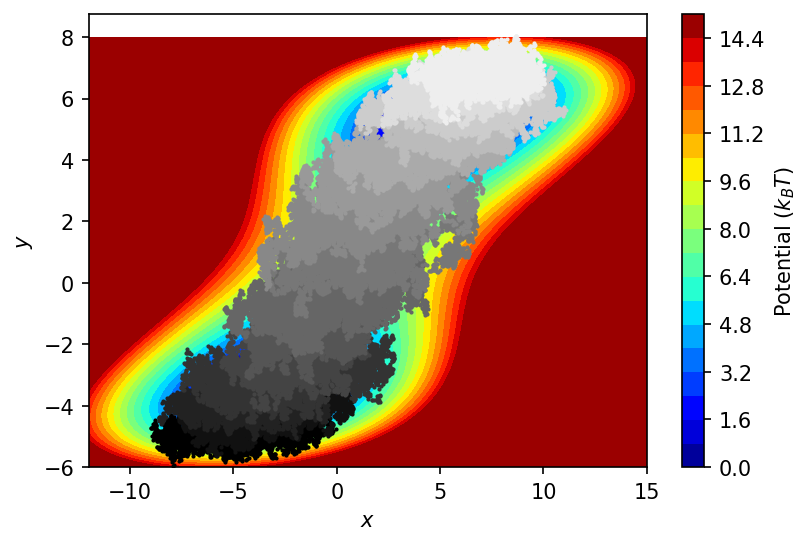

In [35]:
fig, ax = vis.plot_potential()

cmap = plt.get_cmap('gist_gray')
ax.set_prop_cycle(color=[cmap(1.*i/len(y_win)) for i in range(len(y_win))])

for y_0 in y_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/traj.dat".format(kappa, y_0)).read_traj()
    ax.scatter(traj[2000:, 0], traj[2000:, 1], s=1)

### WHAM

Text(0, 0.5, 'Count')

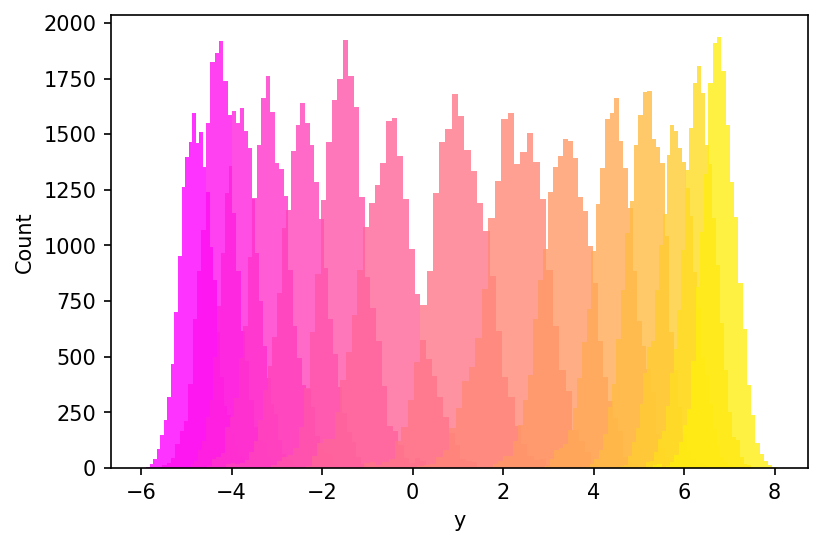

In [36]:
fig, ax = plt.subplots(dpi=150)

cmap = plt.get_cmap('spring')
ax.set_prop_cycle(color=[cmap(1.*i/len(y_win)) for i in range(len(y_win))])

for y_0 in y_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/traj.dat".format(kappa, y_0)).read_traj()
    ax.hist(traj[2000:, 1], bins=30, alpha=0.8)
    
ax.set_xlabel("y")
ax.set_ylabel("Count")

In [37]:
# Data
y_it = []
for y_0 in y_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/traj.dat".format(kappa, y_0)).read_traj()
    y_it.append(traj[2000:, 1])
    
# Umbrella potentials
u_i = []
for y_0 in y_win:
    u_i.append(potentials.harmonic(kappa, y_0))
    
# Bins for free energy profile
y_bin = np.linspace(-6, 8, 101)

# Beta
beta = 1000 / (8.3145 * 300)

Text(0, 0.5, 'Free energy ($k_B T$)')

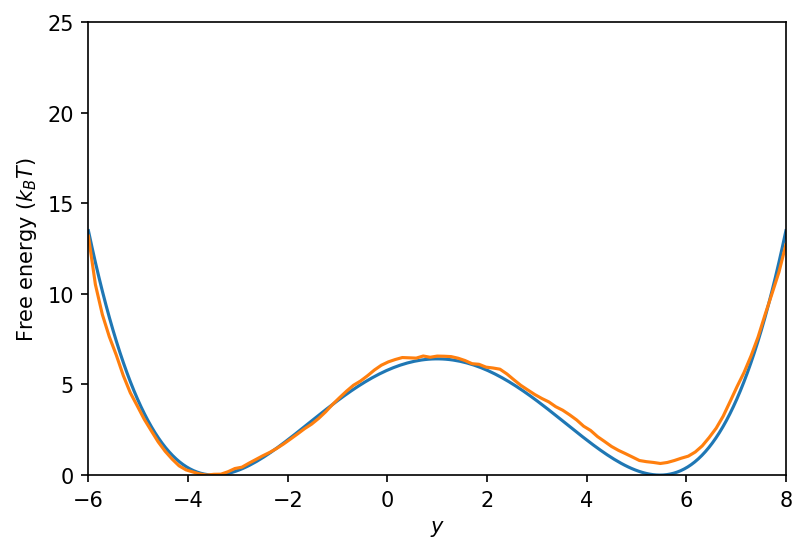

In [38]:
calc_binless = binless.Calc1D()
bF, _, _ = calc_binless.compute_betaF_profile(y_it, y_bin, u_i, beta=beta)
bF = bF - np.min(bF)
fig, ax, _, _ = vis.plot_projection_y() 
ax.plot(y_bin, bF)
ax.set_xlim(-6, 8)
ax.set_ylim(0, 25)
ax.set_ylabel(r"Free energy ($k_B T$)")

[0.00253742 0.010469   0.00318691 0.01305774 0.00900191 0.01162861
 0.01667418 0.01204782 0.02003835 0.00451177 0.00454051 0.00505832
 0.00971542 0.00317508 0.00705945]


Text(0, 0.5, '$D_{KL}$')

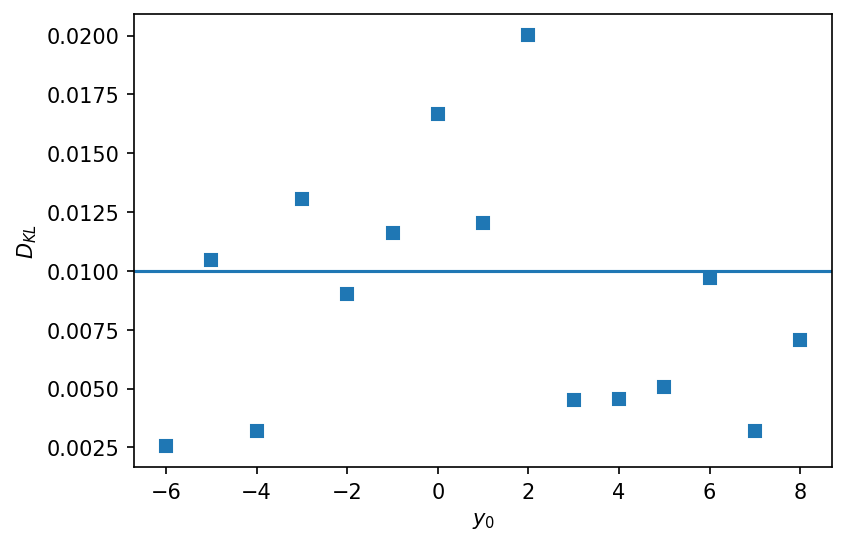

In [39]:
D_KL_i = statistics.binless_KLD_reweighted_win_betaF(calc_binless, y_it, y_bin, u_i, beta)
print(D_KL_i)

fig, ax = plt.subplots(dpi=150)
ax.plot(y_win, D_KL_i, 's')
ax.axhline(y=0.01)
ax.set_xlabel(r"$y_0$")
ax.set_ylabel(r"$D_{KL}$")

In [40]:
# Data
x_it = []
for y_0 in y_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US_hyst/biased_y/k{}y{:.2f}/traj.dat".format(kappa, y_0)).read_traj()
    x_it.append(traj[2000:, 0])
    
# Unroll
x_l = x_it[0]
for i in range(1, len(x_it)):
    x_l = np.hstack((x_l, x_it[i]))
    
# Bins
x_bin = np.linspace(-12, 16, 101)

In [41]:
bF_xy, _ = calc_binless.bin_2D_betaF_profile(x_l, y_bin, x_bin)

bF_xy = bF_xy - np.min(bF_xy)

Text(0.5, 1.0, 'Free energy $(k_B T)$')

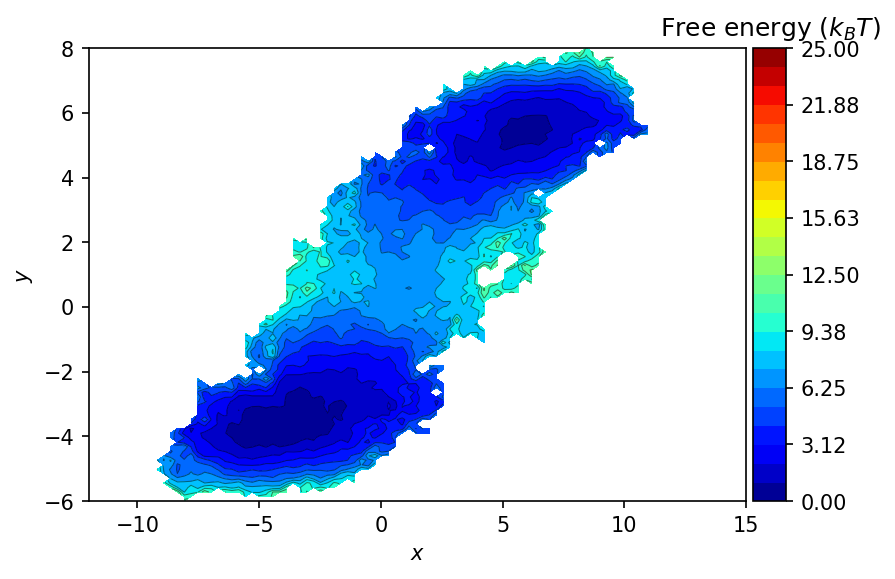

In [42]:
fig, ax = plt.subplots(dpi=150)

levels = np.linspace(0, 25, 25)
cmap = cm.jet
contour_filled = ax.contourf(x_bin, y_bin, bF_xy, levels, cmap=cm.get_cmap(cmap, len(levels) - 1))
ax.contour(contour_filled, colors='k', alpha=0.5, linewidths=0.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(contour_filled, cax=cax, orientation='vertical')

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.set_xlim([-12, 15])
ax.set_ylim([-6, 8])

cax.set_title(r"Free energy $(k_B T)$")